In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title 데이터 불러오기
# https://archive.ics.uci.edu/ml/datasets/wine
# https://www.kaggle.com/datasets/akhil0007/wine-data
file_url = 'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/wine.csv'
df = pd.read_csv(file_url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
pd.options.display.float_format = '{:,.4f}'.format 
df.describe() # KNN -> 거리기반, 숫자 단위에 민감 -> 스케일링 (전처리)

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


In [ ]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

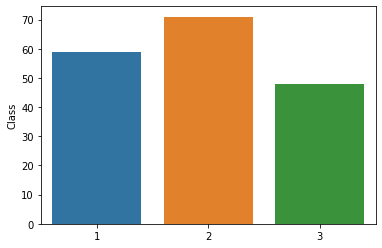

In [ ]:
value_counts = df.Class.value_counts()
sns.barplot(x= value_counts.index, y = value_counts)

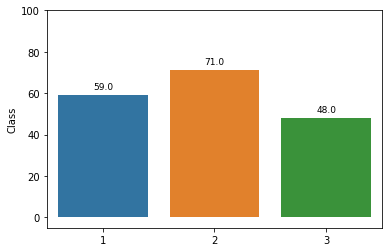

In [ ]:
# https://plotly.com/python/
# barplot 숫자 표시
value_counts = df.Class.value_counts()
bar = sns.barplot(x= value_counts.index, y = value_counts)
for p in bar.patches:
    height = p.get_height()
    bar.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
bar.set_ylim(-5, 100)
plt.show()

In [ ]:
# 데이터 특성 보기 (info, describe)
# 결측치 채워주기
# 범주형 -> 더미 변수
# 훈련셋/시험셋 !!!
# 스케일링 <- 훈련셋을 통해서 만들어진 스케일러로 시험셋 스케일링
# 스케일링 : 아웃라이어의 영향을 줄이거나 범위에 따른 거리의 왜곡
# 훈련하는 대상이 되는 데이터 <-> 시험을 대상으로 하는 데이터는 구분, 독립
# 둘을 합쳐서 스케일링을 하면, 최소-최대? 평균? 25,50,75% 값이 공유
# 훈련셋을 대상으로만 스케일링함 => 스케일러 학습 (훈련셋 학습 스케일러)
# => 시험셋도 이미 학습된(훈련셋학습된 스케일러) 스케일러로 스케일링을 진행

In [ ]:
# 훈련셋과 시험셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1), # axis=0 행, axis=1 축
    df.Class, test_size=0.2, random_state=100
)

In [ ]:
# 최대-최소 스케일러 사용
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = mm_scaler.transform(X_train)
X_train_scaled

array([[0.39210526, 0.33399209, 0.43315508, ..., 0.30172414, 0.55311355,
        0.03352354],
       [0.25526316, 0.53162055, 0.34224599, ..., 0.32758621, 0.65201465,
        0.20399429],
       [0.30789474, 0.45256917, 0.51336898, ..., 0.09482759, 0.20512821,
        0.16547789],
       ...,
       [0.35263158, 0.08498024, 0.29946524, ..., 0.49137931, 0.80952381,
        0.16547789],
       [0.65      , 0.21146245, 0.6684492 , ..., 0.49137931, 0.93406593,
        0.40442225],
       [1.        , 0.17786561, 0.43315508, ..., 0.45689655, 0.57875458,
        0.54707561]])

In [ ]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)
X_test_scaled

array([[ 0.16052632,  0.26086957,  0.58823529,  0.56701031,  0.20289855,
         0.3057554 ,  0.26464208,  0.63265306,  0.29652997,  0.16170213,
         0.38793103,  0.54212454,  0.28673324],
       [ 0.64473684,  0.18379447,  0.68449198,  0.61340206,  0.27536232,
         0.53956835,  0.13665944,  0.71428571,  0.59305994,  1.11382979,
         0.01724138,  0.18681319,  0.24393723],
       [ 0.81315789,  0.14624506,  0.51336898,  0.31958763,  0.36231884,
         0.39568345,  0.42516269,  0.18367347,  0.3659306 ,  0.39574468,
         0.53448276,  0.56776557,  0.7146933 ],
       [ 0.24473684,  0.06916996,  0.5026738 ,  0.53608247,  0.44927536,
         0.82014388,  0.36225597, -0.08163265,  0.39116719,  0.20531915,
         0.37931034,  0.68131868,  0.43366619],
       [ 0.87105263,  0.18577075,  0.71657754,  0.74226804,  0.4057971 ,
         0.61151079,  0.18221258,  0.73469388,  0.72239748,  1.24680851,
         0.01724138,  0.25274725,  0.2724679 ],
       [ 0.53947368,  0.624505

In [ ]:
#@title 모델링
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

In [ ]:
pred

array([2, 3, 1, 2, 3, 3, 2, 3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train, y_train)
pred2 = knn2.predict(X_test)
accuracy_score(y_test, pred2)

0.6388888888888888

In [ ]:
# n은 정수형 int를 패러미터로 받고, 최종 return으로 실수형 float를 돌려준다
def tuning(n: int) -> float:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, pred)
    return score

In [ ]:
tuning(1)

0.9166666666666666

In [ ]:
# for i in range(1, 21):
#     print(tuning(i))
# for i in range(20):
#     print(tuning(i+1))
[tuning(i+1) for i in range(20)]

[0.9166666666666666,
 0.8611111111111112,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9444444444444444,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9444444444444444,
 0.9444444444444444,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

In [ ]:
k_list = [(i, tuning(i)) for i in range(1, 21)]
k_list

[(1, 0.9166666666666666),
 (2, 0.8611111111111112),
 (3, 0.9166666666666666),
 (4, 0.9166666666666666),
 (5, 0.8888888888888888),
 (6, 0.9166666666666666),
 (7, 0.9444444444444444),
 (8, 0.9166666666666666),
 (9, 0.8888888888888888),
 (10, 0.8888888888888888),
 (11, 0.9444444444444444),
 (12, 0.9444444444444444),
 (13, 0.9722222222222222),
 (14, 0.9444444444444444),
 (15, 0.9444444444444444),
 (16, 0.9444444444444444),
 (17, 0.9166666666666666),
 (18, 0.9722222222222222),
 (19, 0.9444444444444444),
 (20, 0.9722222222222222)]

In [ ]:
sorted(k_list, key=lambda x: x[1], reverse = True)

[(13, 0.9722222222222222),
 (18, 0.9722222222222222),
 (20, 0.9722222222222222),
 (7, 0.9444444444444444),
 (11, 0.9444444444444444),
 (12, 0.9444444444444444),
 (14, 0.9444444444444444),
 (15, 0.9444444444444444),
 (16, 0.9444444444444444),
 (19, 0.9444444444444444),
 (1, 0.9166666666666666),
 (3, 0.9166666666666666),
 (4, 0.9166666666666666),
 (6, 0.9166666666666666),
 (8, 0.9166666666666666),
 (17, 0.9166666666666666),
 (5, 0.8888888888888888),
 (9, 0.8888888888888888),
 (10, 0.8888888888888888),
 (2, 0.8611111111111112)]